# <span style="color:green;">UTS Model Deployment</span>

## Zaneta Fransiske - 2702312146
### Dataset B (Hotel) - Case 1

<span style="color: red; font-size: 19px;">A. Exploratory Data Analysis (EDA)</span>

#### Import Library

Berbagai library yang dibutuhkan diimpor:

- `numpy` dan `pandas` digunakan untuk manipulasi data numerik dan tabular.
- `matplotlib.pyplot` dan `seaborn` digunakan untuk visualisasi data.
- `LabelEncoder` dan `StandardScaler` dari `sklearn.preprocessing` digunakan untuk encoding data kategorikal dan normalisasi fitur numerik.
- `train_test_split` digunakan untuk membagi data menjadi data latih dan data uji.
- `RandomForestClassifier` dan `XGBClassifier` adalah algoritma machine learning yang digunakan untuk klasifikasi.
- `accuracy_score`, `classification_report`, `confusion_matrix`, `roc_auc_score`, `precision_score`, `recall_score`, dan `f1_score` digunakan untuk mengevaluasi performa model.
- `pickle` digunakan untuk menyimpan model yang telah dilatih agar bisa digunakan kembali di kemudian hari tanpa perlu melatih ulang.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import pickle

#### Membaca Dataset 
Dataset dibaca menggunakan fungsi `read_csv()` dari library `pandas`. File dataset bernama `Dataset_B_hotel.csv` yang berada di direktori lokal dibaca dengan delimiter koma (`,`), yang merupakan standar pada file CSV.

Dataset ini disimpan dalam variabel `df` untuk digunakan pada tahap-tahap selanjutnya, seperti eksplorasi data, preprocessing, dan pelatihan model.

In [2]:
df = pd.read_csv('C:/COOLYEAH/SEM 4/Model Deployment/UTS/Dataset_B_hotel.csv', delimiter =",")

#### Eksplorasi Awal Dataset

Langkah ini bertujuan untuk memahami struktur dan karakteristik dasar dari dataset:

- `df.head()` menampilkan 5 baris pertama dari dataset, berguna untuk melihat tampilan awal data.
- `df.tail()` menampilkan 5 baris terakhir, berguna untuk memastikan konsistensi data hingga akhir file.
- `df.shape[0]` dan `df.shape[1]` digunakan untuk mengetahui jumlah baris (data) dan kolom (fitur) dalam dataset.
- `df.info()` memberikan informasi detail tentang tipe data di setiap kolom serta jumlah nilai non-null, yang membantu dalam mendeteksi missing values atau fitur dengan tipe data yang tidak sesuai.
- `df.describe()` menampilkan statistik deskriptif seperti nilai minimum, maksimum, mean, dan kuartil dari kolom numerik, yang berguna untuk mendapatkan gambaran umum distribusi data.

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 36275
Number of columns: 19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Check Data Duplikat
Mencari apakah terdapat baris yang duplikat dalam dataset

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


#### Check Missing Value

Mendeteksi kolom mana yang memiliki missing value

In [9]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64


#### Check Value Unik

Melihat distribusi nilai unik di setiap kolom dengan tipe data objek

In [10]:
for c in df.columns:
  if df[c].dtype == 'object':
    print(f"\n")
    print(df[c].value_counts())



Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64


type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64


room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


#### Check Outlier Pada Numerical Data

Visualisasi, deteksi dengan IQR, dan mengukur skewness untuk memeriksa distribusi dan outliers dari kolom-kolom numerik

##### <span style="color: gray; font-size: 15px;">Boxplot & Data Distribution</span> 

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

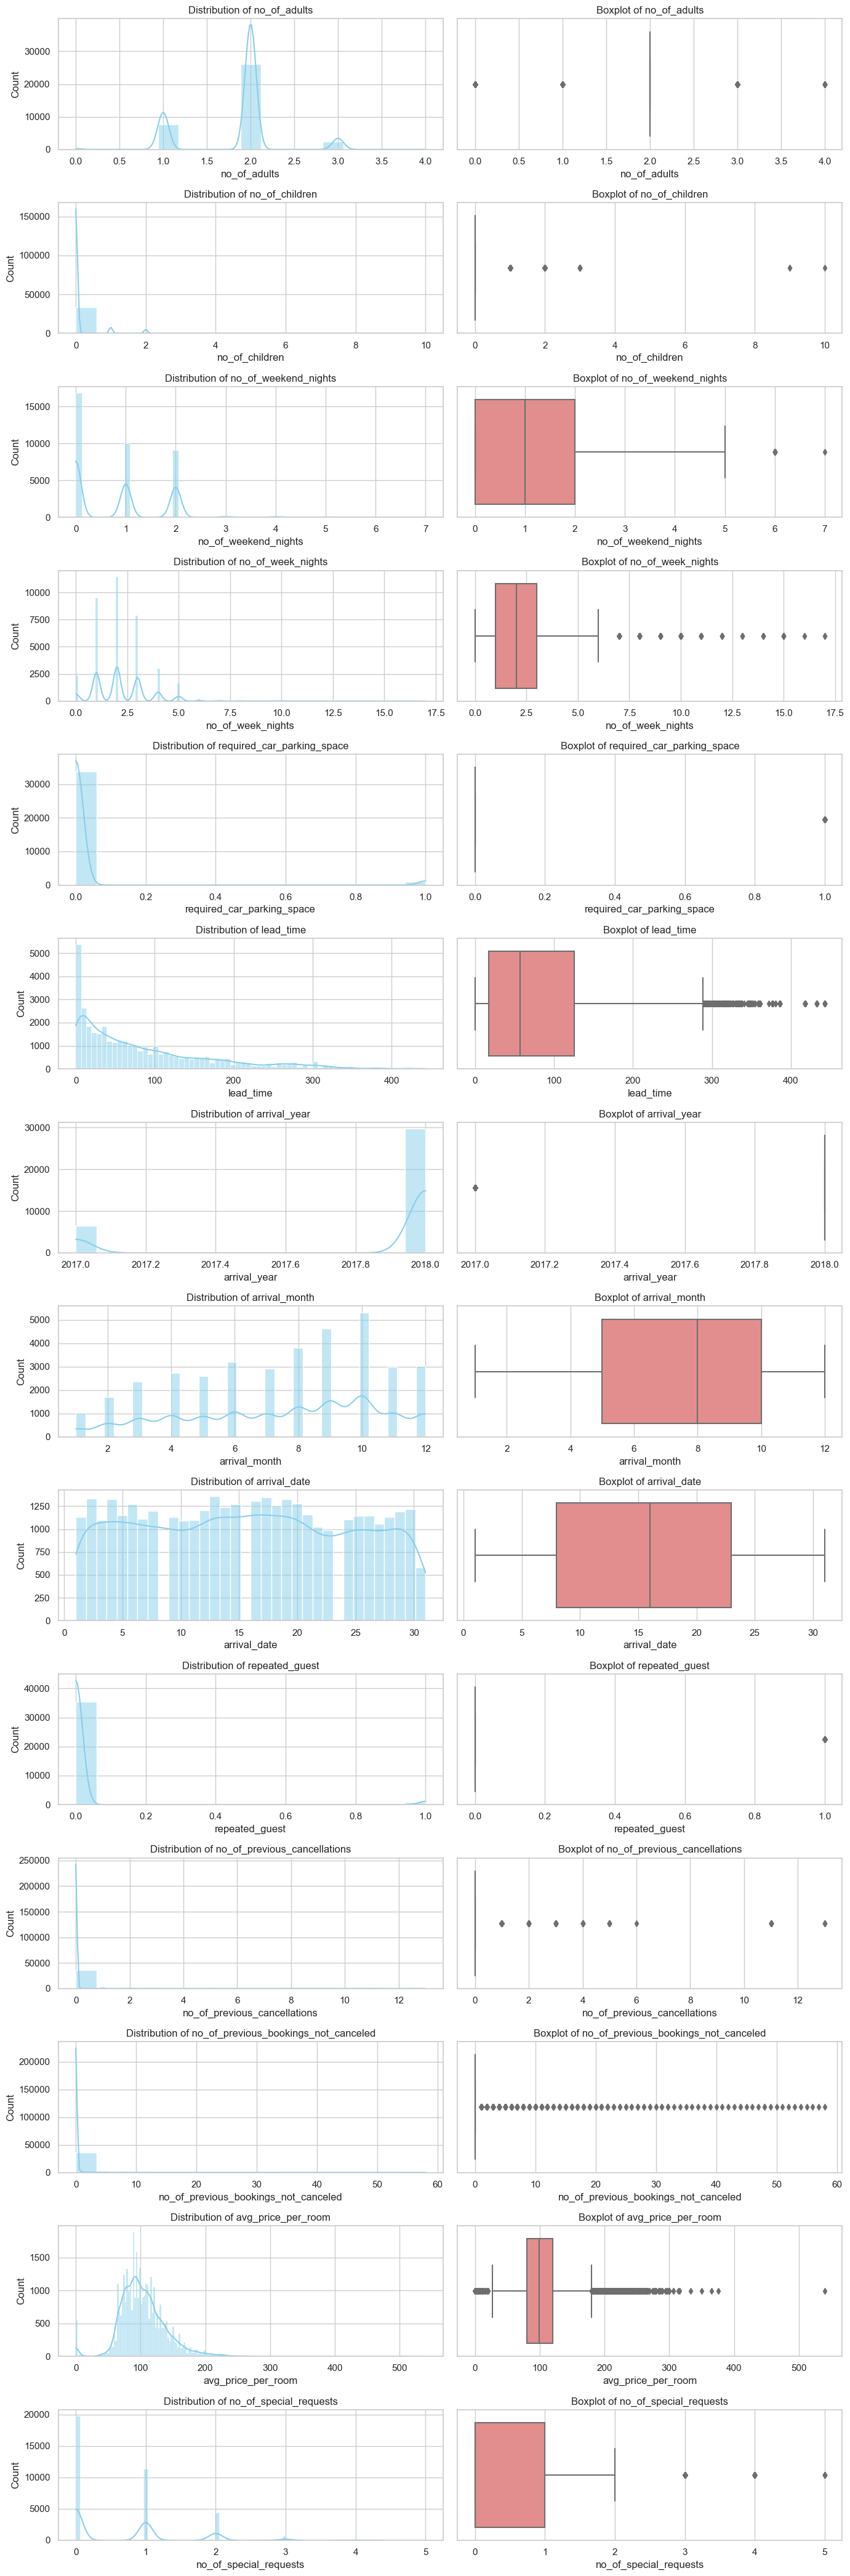

In [12]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(14, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### <span style="color: gray; font-size: 15px;">Interquantile Range (IQR)</span> 

In [13]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col, data in outliers.items():
    print(f"Outliers in column {col}:")
    print(data)
    print("\n")


Outliers in column no_of_adults:
      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
2       INN00003             1               0                     2   
8       INN00009             3               0                     0   
10      INN00011             1               0                     1   
11      INN00012             1               0                     2   
13      INN00014             1               0                     2   
...          ...           ...             ...                   ...   
36260   INN36261             3               0                     1   
36261   INN36262             1               0                     2   
36263   INN36264             1               0                     2   
36268   INN36269             1               0                     0   
36270   INN36271             3               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
2                      1    

##### <span style="color: gray; font-size: 15px;">Skewness</span> 

In [14]:
from scipy.stats import skew
for col in numeric_cols:
    print(f"Skewness of {col}: {skew(df[col])}")

Skewness of no_of_adults: -0.3332811480628733
Skewness of no_of_children: 4.710154739583836
Skewness of no_of_weekend_nights: 0.7375854562511297
Skewness of no_of_week_nights: 1.5992842300276306
Skewness of required_car_parking_space: nan
Skewness of lead_time: 1.292438086907913
Skewness of arrival_year: -1.6696263055349456
Skewness of arrival_month: -0.3482144521729693
Skewness of arrival_date: 0.02880737786859992
Skewness of repeated_guest: 6.002640120051878
Skewness of no_of_previous_cancellations: 25.19883390526328
Skewness of no_of_previous_bookings_not_canceled: 19.249394657611052
Skewness of avg_price_per_room: nan
Skewness of no_of_special_requests: 1.1450334208536157


no_of_adults = Tidak Perlu Dibersihkan

<span style="color: red; font-size: 15px;">no_of_children</span>= Outlier Perlu Dibersihkan 

no_of_weekend_nights = Tidak Perlu Dibersihkan

<span style="color: blue; font-size: 15px;">no_of_week_nights</span>= Tidak Perlu Dibersihkan

required_car_parking_space = NaN	Tidak Perlu Dibersihkan Karena Binary (0/1), 

<span style="color: red; font-size: 15px;">lead_time</span>= Outlier Perlu Dibersihkan 

arrival_year = Tidak Perlu Dibersihkan 

arrival_month = Tidak Perlu Dibersihkan

arrival_date = Tidak Perlu Dibersihkan 

repeated_guest	6.00 = Tidak Perlu Dibersihkan Karena Binary (0/1), skewed tapi valid

<span style="color: red; font-size: 15px;">no_of_previous_cancellations</span>= Outlier Perlu Dibersihkan

<span style="color: red; font-size: 15px;">no_of_previous_bookings_not_canceled</span> = Outlier Perlu Dibersihkan

<span style="color: red; font-size: 15px;">avg_price_per_room</span> = Outlier Perlu Dibersihkan

<span style="color: blue; font-size: 15px;">no_of_special_requests</span> = Tidak Perlu Dibersihkan

#### Distribusi Kolom Target
Membuat grafik batang yang menunjukkan frekuensi masing-masing kategori pada kolom `booking_status`. Kolom ini menunjukkan status pemesanan: apakah dibatalkan (`1`) atau tidak dibatalkan (`0`)

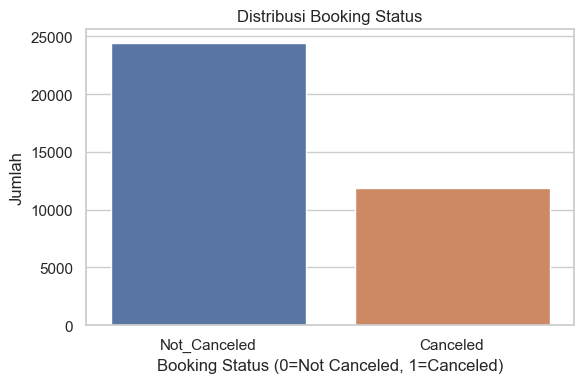

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df)
plt.title("Distribusi Booking Status")
plt.xlabel("Booking Status (0=Not Canceled, 1=Canceled)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

#### Distribusi Beberapa Kolom Numeric Terhadap Kolom Target

Distribusi beberapa kolom numerik divisualisasikan berdasarkan status pemesanan (`booking_status`) yang berguna untuk menganalisis bagaimana distribusi kolom numerik berbeda antara pemesanan yang dibatalkan dan yang tidak dibatalkan, yang bisa membantu dalam memahami faktor-faktor yang memengaruhi pembatalan.

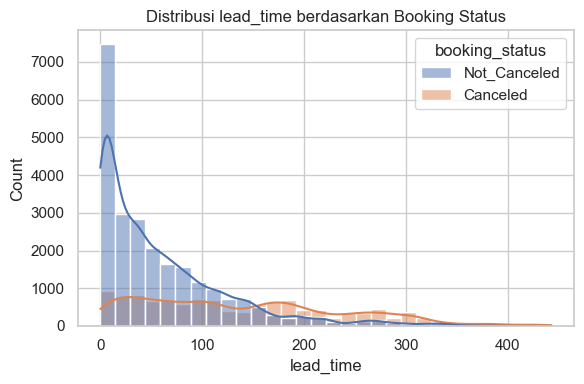

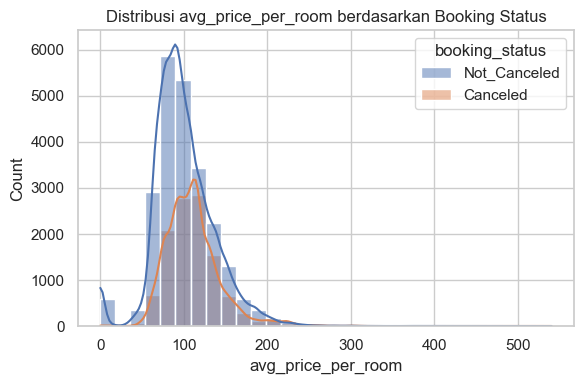

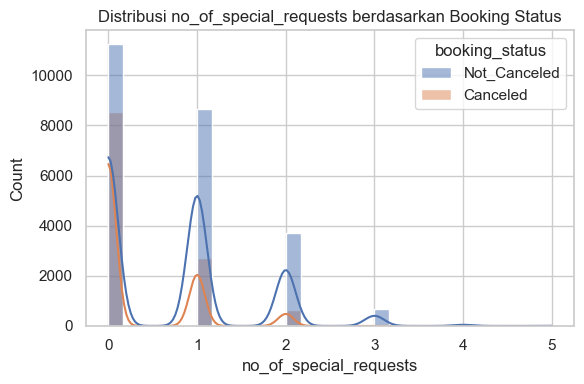

In [16]:
num_cols_dist = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
for col in num_cols_dist:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='booking_status', kde=True, bins=30)
    plt.title(f'Distribusi {col} berdasarkan Booking Status')
    plt.tight_layout()
    plt.show()


#### Distribusi Kolom Kategorikal Terhadap Kolom Target
Untuk memahami bagaimana distribusi data kategorikal mempengaruhi status pemesanan, yang bisa memberikan wawasan tentang faktor-faktor yang memengaruhi pembatalan.

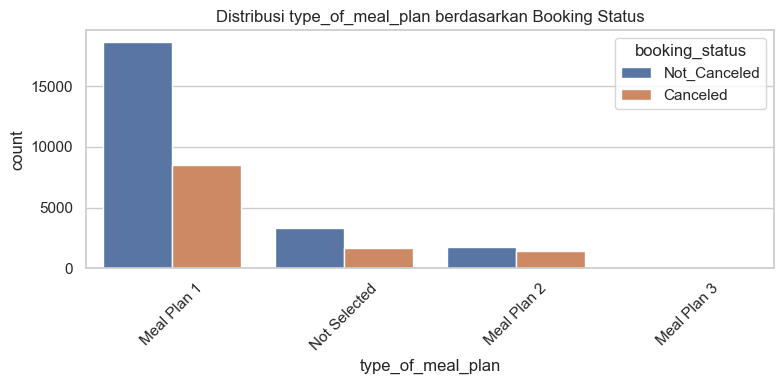

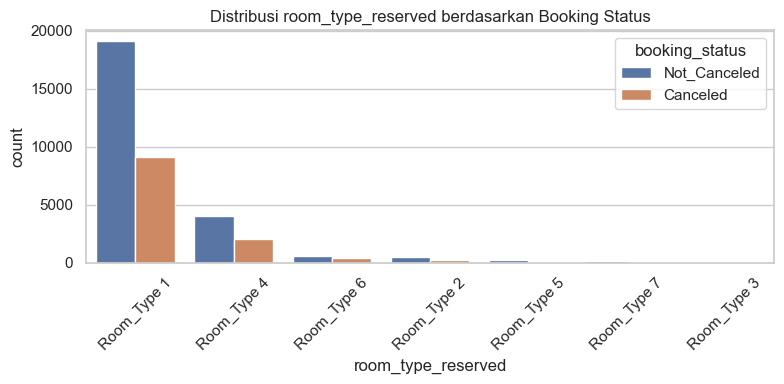

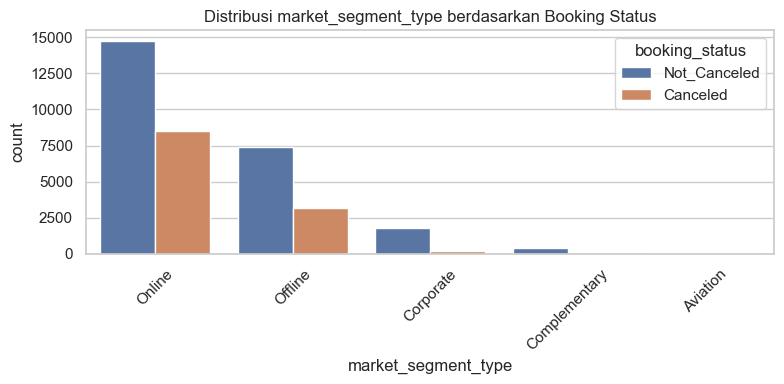

In [17]:
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='booking_status', order=df[col].value_counts().index)
    plt.title(f'Distribusi {col} berdasarkan Booking Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Heatmap Korelasi

Heatmap untuk melihat hubungan antara kolom-kolom numerik dalam dataset

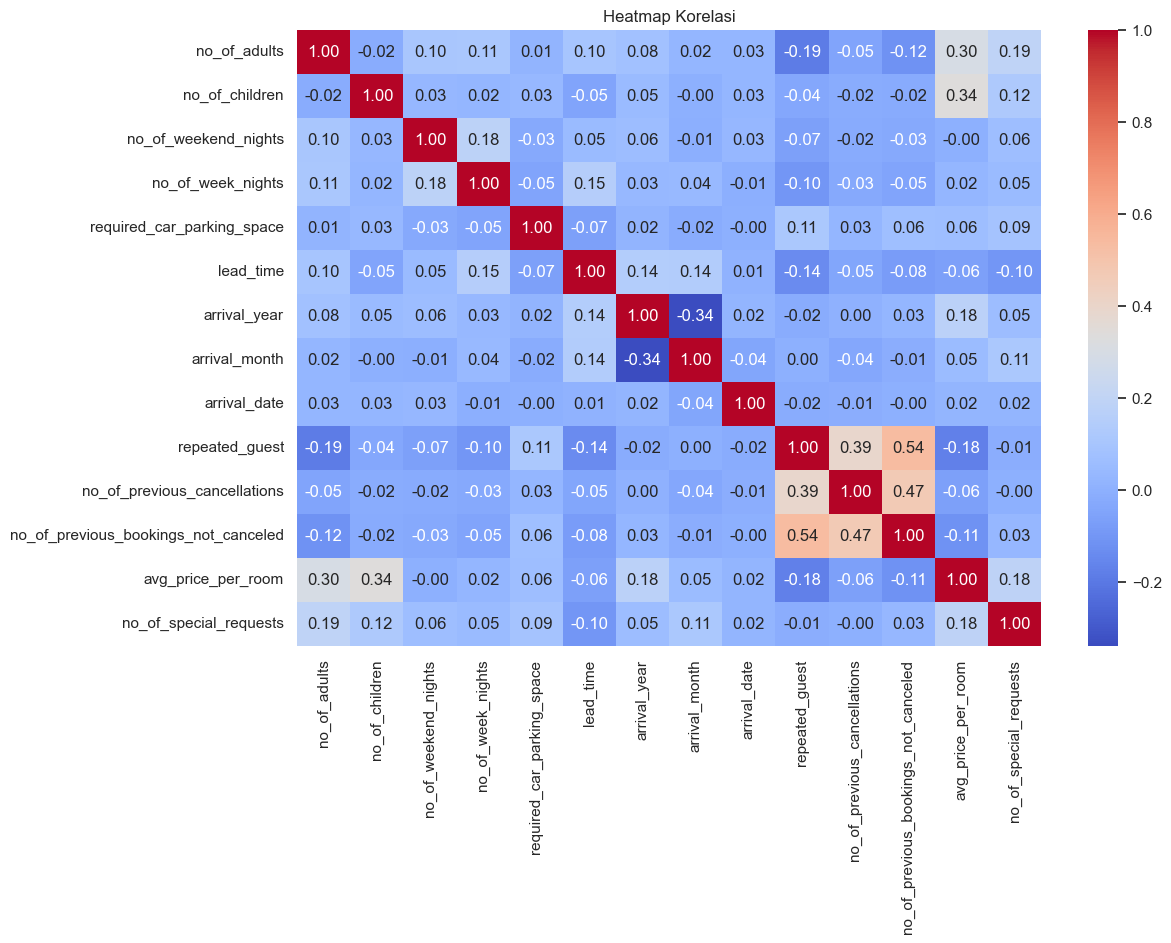

In [18]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

### Hasil EDA:
#### Bedasarkan hasil Explaratory Data Analysis (EDA), Berikut hasil dari dataset:

- Data terdiri  dari 36275 baris dan 19 kolom.

Data Duplicate:
- Semua kolom tidak ada data yang duplikat

Missing Value:
- Kolom type_of_meal_plan memiliki 907 missing value
- required_car_parking_space memiliki 1270 missing value
- avg_price_per_room memiliki 1632 missing value
- Kolom lainnya tidak memiliki missing value

Outliers:
- no_of_children
- lead_time
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- avg_price_per_room
- Tidak ada outlier yang signifikan pada kolom lainnya



<span style="color: blue; font-size: 19px;">Data Preprocessing</span>

#### Dari hasil EDA, berikut beberapa langkah-langkah data preprocesssing yang harus dilakukan :

1. Handle Missing Value
2. Handle Outlier
3. Encoding Kolom Kategorikal
4. Scaling Kolom Numerik
5. Split Data Train dan Test

#### Handle Missing Value

Mengisi missing values pada kolom kategorikal dengan modus dan kolom numerikal dengan 0 pada kolom `required_car_parking_space` dan median pada kolom `avg_price_per_room`

##### <span style="color: gray; font-size: 15px;">Kolom Kategorikal</span> 

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

##### <span style="color: gray; font-size: 15px;">Kolom Numerikal</span> 

In [20]:
df["required_car_parking_space"].fillna(0, inplace=True)
df["avg_price_per_room"].fillna(df["avg_price_per_room"].median(), inplace=True)

In [21]:
print(df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


#### Handle Outliers
Menghapus data outlier dari dataset berdasarkan IQR (Interquartile Range) dan juga melakukan filter khusus pada kolom `no_of_children`

In [22]:
df = df[df['no_of_children'] <= 3]

In [23]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [24]:
cols_to_clean = ['lead_time', 'avg_price_per_room','no_of_previous_cancellations','no_of_previous_bookings_not_canceled']
df_cleaned = remove_outliers(df, cols_to_clean)

#### Encoding kolom Kategorikal
mengubah data kategorikal menjadi numerik dengan Label Encoding, serta mengubah nilai target `booking_status` menjadi biner

In [25]:
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

##### <span style="color: gray; font-size: 15px;">Kolom Target</span> 

In [26]:
df_cleaned['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

#### Scalling Kolom Numerical
Menstandarisasi fitur numerik agar memiliki skala yang sama menggunakan StandardScaler 

In [27]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[num_cols])
df_cleaned[num_cols] = scaled_features

#### Split Data 
Memisahkan fitur dan target, lalu membagi data menjadi data training dan data testing

In [28]:
X = df_cleaned.drop(columns=['Booking_ID', 'booking_status'])
y = df_cleaned['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X berisi semua kolom fitur, yaitu seluruh kolom kecuali:

    'Booking_ID': ID unik yang tidak memiliki pengaruh langsung terhadap prediksi.

    'booking_status': kolom target yang ingin diprediksi.

y adalah target (label) yang berisi nilai 0 atau 1, tergantung apakah pemesanan dibatalkan atau tidak.

train_test_split() membagi data menjadi:

    80% untuk data latih (X_train, y_train)

    20% untuk data uji (X_test, y_test)

<span style="color: red; font-size: 19px;">B. Random Forest and XGBoost model</span>

Pelatihan model menggunakan Random Forest dan XGBoost serta evaluasi performanya

<span style="color: blue; font-size: 19px;">Random Forest</span>

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy: {:.2f}\n".format(accuracy_score(y_test, y_pred_rf)))
print("Random Forest ROC AUC Score: {:.2f}\n".format(roc_auc_score(y_test, y_pred_rf)))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.90

Random Forest ROC AUC Score: 0.87

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4420
           1       0.87      0.80      0.84      2080

    accuracy                           0.90      6500
   macro avg       0.89      0.87      0.88      6500
weighted avg       0.90      0.90      0.90      6500



#### Analisis
Model Random Forest yang telah dilatih menunjukkan performa yang **cukup baik** dalam memprediksi apakah suatu pemesanan hotel akan dibatalkan atau tidak. 

##### 1. **Akurasi (Accuracy): 0.90 atau 90%**
- dari seluruh data testing, 90% prediksi model sesuai dengan label sebenarnya.
- Ini menunjukkan model cukup baik.

##### 2. **ROC AUC Score: 0.87**
- AUC (Area Under Curve) menggambarkan kemampuan model membedakan antara kelas 0 (Not Canceled) dan 1 (Canceled).
- Nilai 0.87 menunjukkan model memiliki **kemampuan klasifikasi yang sangat baik** .

##### 3. **Classification Report**
- **Precision**:
  - Kelas 0: 91% dari prediksi "Not Canceled" benar.
  - Kelas 1: 87% dari prediksi "Canceled" benar.
  - Artinya, model cukup akurat dalam memberikan label positif (terutama kelas 0).

- **Recall**:
  - Kelas 0: 95% dari total "Not Canceled" berhasil dikenali dengan benar.
  - Kelas 1: 80% dari total "Canceled" berhasil dikenali.
  - Recall kelas 1 (80%) sedikit lebih rendah, artinya ada sebagian booking yang sebenarnya dibatalkan tetapi model gagal mendeteksinya (**false negatives**).

- **F1-Score**:
  - Kombinasi precision dan recall.
  - Kelas 0: 0.93, Kelas 1: 0.84
  - Model lebih baik mengenali kelas mayoritas (0), tetapi tetap cukup bagus untuk kelas minoritas (1).

##### 4. **Macro vs Weighted Average**
- **Macro avg**: rata-rata sederhana antar kelas, berguna saat ingin mengevaluasi keseimbangan performa antar kelas.
- **Weighted avg**: memperhitungkan proporsi tiap kelas (karena kelas 0 lebih banyak dari kelas 1).
- Kedua nilai cukup seimbang, yang menunjukkan bahwa model tidak bias berlebihan terhadap salah satu kelas.


#### Confusion Matric Random Forest

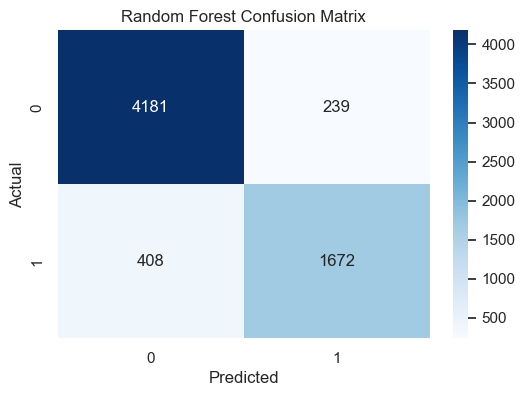

In [30]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Model sangat baik dalam mengenali pemesanan yang tidak dibatalkan (TN = 4181).
- Model perlu ditingkatkan dalam mengenali pembatalan (FN = 408).

<span style="color: blue; font-size: 19px;">XGBoost</span>

In [31]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy: {:.2f}\n".format(accuracy_score(y_test, y_pred_xgb)))
print("XGBoost ROC AUC Score: {:.2f}\n".format(roc_auc_score(y_test, y_pred_xgb)))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.89

XGBoost ROC AUC Score: 0.87

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4420
           1       0.85      0.80      0.83      2080

    accuracy                           0.89      6500
   macro avg       0.88      0.87      0.87      6500
weighted avg       0.89      0.89      0.89      6500



#### Analisis
#### 1. Akurasi (Accuracy): **0.89 atau 89%**
- Sedikit lebih rendah dari Random Forest (0.90).
- Menunjukkan bahwa secara keseluruhan prediksi model sudah sangat baik.

#### 2. ROC AUC Score: **0.87**
- Sama dengan Random Forest.
- Menunjukkan kemampuan membedakan antara kelas 0 dan 1 tetap sangat baik.

#### 3. Classification Report:
- **Precision**:
  - Kelas 0: 91%
  - Kelas 1: 85%
- **Recall**:
  - Kelas 0: 94% → Sangat tinggi, model sangat mampu mengenali pemesanan yang tidak dibatalkan.
  - Kelas 1: 80% → Masih cukup baik, namun sedikit di bawah ideal.
- **F1-score**:
  - Kelas 0: 0.92
  - Kelas 1: 0.83
  
#### 4. Macro vs Weighted Average:
- **Macro avg**: 0.87 (rata-rata metrik antar kelas tanpa mempertimbangkan jumlah data).
- **Weighted avg**: 0.89 (rata-rata metrik dengan mempertimbangkan jumlah data).
- Nilai yang tinggi dan seimbang menunjukkan model tidak terlalu bias ke salah satu kelas.


#### Confusion Matrix XGBoost

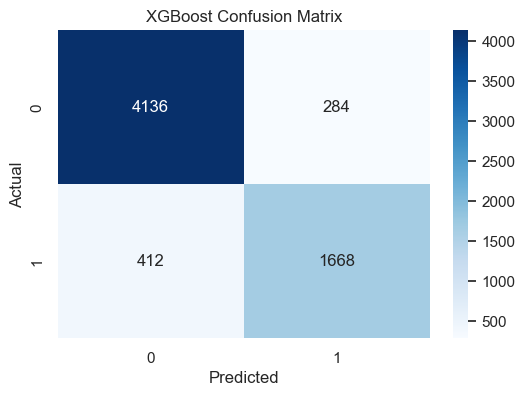

In [32]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- XGBoost memiliki **sedikit lebih banyak kesalahan (FP dan FN)** dibanding Random Forest.
- TP dan TN-nya hampir sama menunjukkan performa tetap kuat, hanya kurang sedikit presisi dibanding Random Forest.

<span style="color: red; font-size: 19px;">C. Model Comparison</span>

Membandingkan performa setiap model untuk memilih model terbaik yang dapat digunakan untuk prediksi atau deployment. Proses perbandingan model mencakup evaluasi berbagai metrik kinerja seperti **Accuracy**, **ROC AUC**, **Precision**, **Recall**, dan **F1-Score**.

#### Metrics Random Forest dan XGBoost

In [33]:
#Random Forest
rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 2)
rf_roc_auc = round(roc_auc_score(y_test, y_pred_rf), 2)
rf_precision = round(precision_score(y_test, y_pred_rf), 2)
rf_recall = round(recall_score(y_test, y_pred_rf), 2)
rf_f1 = round(f1_score(y_test, y_pred_rf), 2)

#XGBoost
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 2)
xgb_roc_auc = round(roc_auc_score(y_test, y_pred_xgb), 2)
xgb_precision = round(precision_score(y_test, y_pred_xgb), 2)
xgb_recall = round(recall_score(y_test, y_pred_xgb), 2)
xgb_f1 = round(f1_score(y_test, y_pred_xgb), 2)


#### Compare

In [34]:
comparison_df = pd.DataFrame({
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'ROC AUC': [rf_roc_auc, xgb_roc_auc],
    'Precision': [rf_precision, xgb_precision],
    'Recall': [rf_recall, xgb_recall],
    'F1-score': [rf_f1, xgb_f1]
}, index=['Random Forest', 'XGBoost'])

print("Perbandingan Model :\n")
print(comparison_df)

Perbandingan Model :

               Accuracy  ROC AUC  Precision  Recall  F1-score
Random Forest      0.90     0.87       0.87     0.8      0.84
XGBoost            0.89     0.87       0.85     0.8      0.83


<Figure size 1200x600 with 0 Axes>

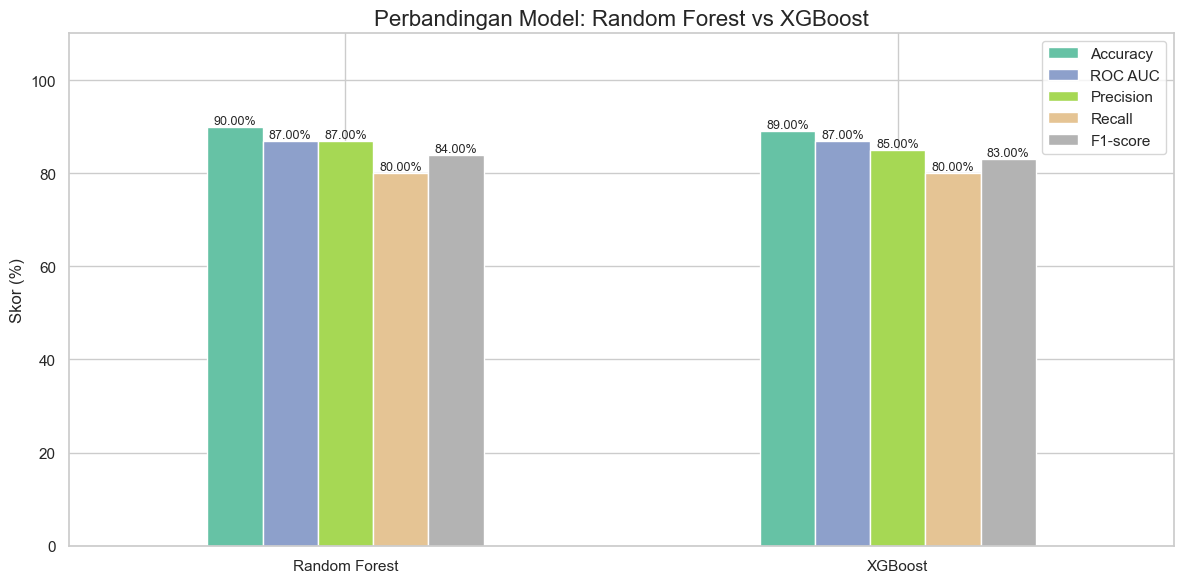

In [35]:
comparison_percent = comparison_df * 100

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = comparison_percent.plot(kind='bar', figsize=(12, 6), colormap='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title("Perbandingan Model: Random Forest vs XGBoost", fontsize=16)
plt.ylabel("Skor (%)")
plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Analisis:
1. **Accuracy**:
   - Random Forest sedikit lebih unggul dengan akurasi 90% dibandingkan XGBoost yang mencapai 89%.
   - Perbedaan ini cukup kecil, namun Random Forest lebih **stabil** dalam hal prediksi keseluruhan.

2. **ROC AUC**:
   - Kedua model memiliki **ROC AUC yang sama**, yaitu 0.87. Ini menunjukkan bahwa kedua model memiliki kemampuan yang hampir identik dalam membedakan antara kelas 0 dan 1.

3. **Precision**:
   - **Precision** untuk Random Forest (0.87) sedikit lebih tinggi dibandingkan XGBoost (0.85).
   - Random Forest sedikit lebih baik dalam hal **menghindari kesalahan positif** (False Positives).

4. **Recall**:
   - **Recall** keduanya sama, yaitu 0.80.
   - Kedua model memiliki performa yang setara dalam **mendeteksi kelas 1 (Canceled)**, namun ada ruang untuk perbaikan di sini.

5. **F1-score**:
   - **F1-score** sedikit lebih tinggi untuk Random Forest (0.84) dibandingkan XGBoost (0.83), yang berarti Random Forest memiliki keseimbangan yang sedikit lebih baik antara precision dan recall.
   
   
**Random Forest** sedikit lebih unggul dalam hal **akurasi, precision, dan F1-score**, namun keduanya memiliki **ROC AUC yang sama**, menunjukkan kemampuan yang serupa dalam membedakan kelas.


#### Best Model

In [36]:
comparison_df['Average Score'] = comparison_df.mean(axis=1)
best_model = comparison_df['Average Score'].idxmax()
print(f"Model terbaik berdasarkan perbandingan semua metrik: {best_model}")

if best_model == "XGBoost":
    model = xgb_model
else:
    model = rf_model

Model terbaik berdasarkan perbandingan semua metrik: Random Forest


Random Forest tampil lebih unggul dalam hal akurasi, precision, dan F1-score secara keseluruhan.

Oleh karena itu, model yang akan digunakan untuk prediksi atau deployment adalah Random Forest.

<span style="color: red; font-size: 19px;">D. Features Importances Dari Best Model</span>

Menampilkan feature importance yang menggambarkan seberapa besar kontribusi masing-masing fitur terhadap keputusan model.

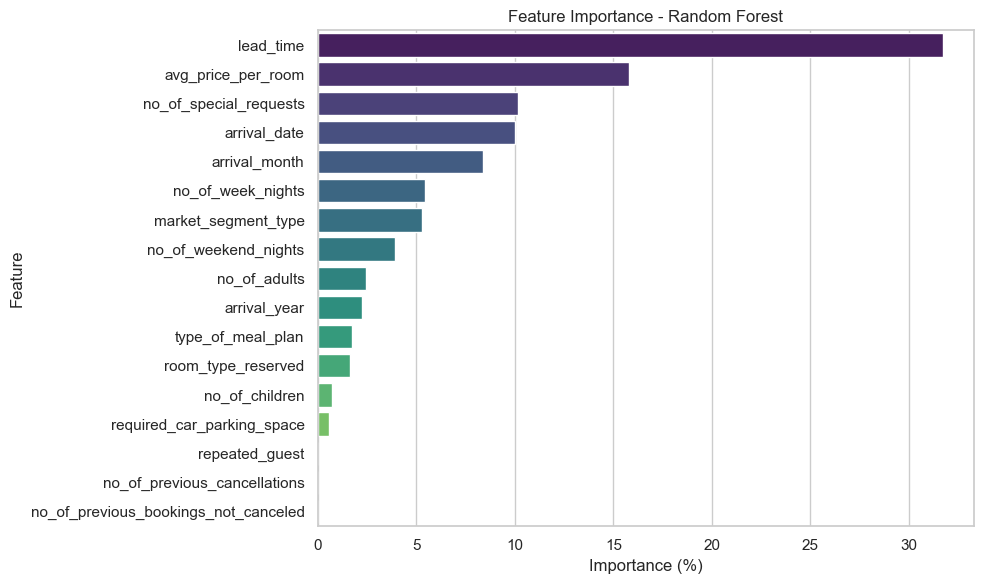

In [37]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances * 100 
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title(f'Feature Importance - {best_model}')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Analisis

##### Fitur Penting
- **lead_time** adalah fitur paling signifikan dengan importance tertinggi (sekitar 28-30%)
- **avg_price_per_room** berada di posisi kedua dengan importance sekitar 20-25%
- **no_of_special_requests** di posisi ketiga (~15%)

##### Fitur Menengah

- **arrival_date**
- **arrival_month**
- **no_of_week_nights**
- **market_segment_type**
- **no_of_weekend_nights**

##### Fitur Minim
- **no_of_adults**
- **arrival_year**
- **type_of_meal_plan**
- **room_type_reserved**
- **no_of_children**
- **required_car_parking_space**
- **repeated_guest**
- **no_of_previous_cancellations**
- **no_of_previous_bookings_not_canceled**

memiliki kontribusi sangat kecil (<5%) terhadap model.

<span style="color: red; font-size: 19px;">E. Save Best Model Dengan Pickle</span>

Menggunakan Pickle untuk menyimpan model machine learning, ke dalam file sehingga bisa digunakan kembali tanpa perlu pelatihan ulang. 

In [40]:
with open('C:/COOLYEAH/SEM 4/Model Deployment/UTS/best_modell.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Best Model telah disimpan.")

Best Model telah disimpan.


<span style="color: red; font-size: 19px;">F. Video Link</span>

**Youtube**: https://youtu.be/dBQmqQquscw

**Google Drive**: https://drive.google.com/file/d/1Y4z4LGf1nERX2GUCobnmvWJHYZxb6f1A/view?usp=sharing